<a href="https://colab.research.google.com/github/ToniMarGar/Project-Transfer-Learning/blob/main/Mini_project_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importación del Dataset

In [217]:
import pandas as pd

# Ver las primeras líneas del archivo para identificar el delimitador
with open('/content/tweets_politica_kaggle.csv', 'r') as file:
    for i in range(5):  # Mostrar las primeras 5 líneas
        print(file.readline())


cuenta	partido	timestamp	tweet

a34133350b0605cb24081843f63176ca	psoe	1363973492.0	@vesteve3 @manubenas @ccoo_rm @desobediencia_ @ccoo @emparempar (Buen ánimo para esta primavera que iniciamos).

a34133350b0605cb24081843f63176ca	psoe	1364061035.0	"“@kirovast: @Hugo_Moran muy fan de la ""radicalidad social""” (Frente a la devaluación democrática)."

a34133350b0605cb24081843f63176ca	psoe	1364116804.0	@ALTAS_PRESIONES Nuevos puta dueños para las jodido renovables. En ese momento ya no serán un problema sino una apuesta magnífica.

a34133350b0605cb24081843f63176ca	psoe	1364120967.0	@jumanjisolar @solartradex @josea_dolera El diferencial de precios energéticos con Alemania o Francia sigue siendo el mismo, 8-11 €/MWh.



In [218]:
import pandas as pd
# Descargar el dataset de Jigsaw
#!wget https://storage.googleapis.com/jigsaw-unintended-bias-in-toxicity-classification/train.csv

csv_file_path = '/content/tweets_politica_kaggle.csv'

df = pd.read_csv(csv_file_path, delimiter='\t', on_bad_lines='skip')

df


,cuenta,partido,timestamp,tweet
0,a34133350b0605cb24081843f63176ca,psoe,1.363973e+09,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...
1,a34133350b0605cb24081843f63176ca,psoe,1.364061e+09,"“@kirovast: @Hugo_Moran muy fan de la ""radical..."
2,a34133350b0605cb24081843f63176ca,psoe,1.364117e+09,@ALTAS_PRESIONES Nuevos puta dueños para las j...
3,a34133350b0605cb24081843f63176ca,psoe,1.364121e+09,@jumanjisolar @solartradex @josea_dolera El di...
4,a34133350b0605cb24081843f63176ca,psoe,1.364153e+09,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...
...,...,...,...,...
17514,9a4d80c7bfc23995a0ff00f9daebf5e9,ciudadanos,1.567918e+09,Qué noticia tan triste el fallecimiento de Cam...
17515,0d2d5c5bc2d395c5b2e15421f5be0f90,vox,1.567920e+09,Bien dicho!Piqué: «Soy español y deseo que gan...
17516,5c68aba356b81ea5ffdf00c1323dd3b2,pp,1.567920e+09,Triste noticia el fallecimiento de Camilo Sest...
17517,b01d435b24a17890fb701cef5253cc06,psoe,1.567921e+09,Dedican su vida a ayudar a quienes lo necesita...


In [219]:
df = df.drop(columns=['cuenta', 'timestamp'])
df

,partido,tweet
0,psoe,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...
1,psoe,"“@kirovast: @Hugo_Moran muy fan de la ""radical..."
2,psoe,@ALTAS_PRESIONES Nuevos puta dueños para las j...
3,psoe,@jumanjisolar @solartradex @josea_dolera El di...
4,psoe,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...
...,...,...
17514,ciudadanos,Qué noticia tan triste el fallecimiento de Cam...
17515,vox,Bien dicho!Piqué: «Soy español y deseo que gan...
17516,pp,Triste noticia el fallecimiento de Camilo Sest...
17517,psoe,Dedican su vida a ayudar a quienes lo necesita...


In [220]:
# Diccionario de palabras tóxicas
palabras_toxicas = [
    "idiota", "imbécil", "tonto", "estúpido", "burro", "payaso", "basura", "inútil",
    "mediocre", "pendejo", "cabron", "mierda", "maldito", "carajo", "cállate", "muérete",
    "vete", "infeliz", "asco", "repugnante", "despreciable", "racista", "sexista",
    "machista", "homofóbico", "nazi", "feminazi", "estúpida", "perra", "zorra", "puta",
    "mierdero", "asqueroso", "mugroso", "ridículo", "desgraciado", "imbecilidad",
    "imbéciles", "gusano", "parasito", "tarado", "cretino", "baboso", "malnacido",
    "arrastrado", "despreciable", "tóxico", "idiotez", "bastardo", "mamón", "zángano",
    "miserable", "patético", "jodido", "inservible", "anormal", "payasa", "patética",
    "escoria", "infame", "apestoso", "cínico", "grosero", "repulsivo", "miseria",
    "tarada", "cretina", "babosa", "desalmado", "grotesco", "pervertido", "traidor",
    "traidora", "tramposo", "tramposa", "hipócrita", "despreciable", "intolerante",
    "ignorante", "arrogante", "mentiroso", "mentirosa", "chismoso", "chismosa", "tóxica",
    "patán", "chafa", "mediocridad", "sinvergüenza", "malagradecido", "malagradecida",
    "engreído", "engreída", "envidioso", "envidiosa", "presumido", "presumida",
    "nefasto", "nefasta", "cretinismo", "odioso", "odiosa", "despotricar", "mamarracho",
    "aberrante", "repudio", "desgracia", "absurdo", "absurda", "patán", "bruto",
    "bruta", "tremendo", "ridiculizar", "estupidizar", "maldición", "necedad",
    "mala", "peor", "mezquino", "mezquina", "bochornoso", "bochornosa"
]

In [221]:
from transformers import pipeline
'''
# Cargar el modelo preentrenado para detectar toxicidad
classifier = pipeline("text-classification", model="unitary/toxic-bert")

# Ejemplo de uso
tweets = ["Te odio!", "Que pases un buen dia!"]
results = classifier(tweets)

for tweet, result in zip(tweets, results):
    print(f"Tweet: {tweet} => Predicción: {result}")
'''

'\n# Cargar el modelo preentrenado para detectar toxicidad\nclassifier = pipeline("text-classification", model="unitary/toxic-bert")\n\n# Ejemplo de uso\ntweets = ["Te odio!", "Que pases un buen dia!"]\nresults = classifier(tweets)\n\nfor tweet, result in zip(tweets, results):\n    print(f"Tweet: {tweet} => Predicción: {result}")\n'

In [222]:
df_conteo = df.groupby('partido')['tweet'].count().reset_index()

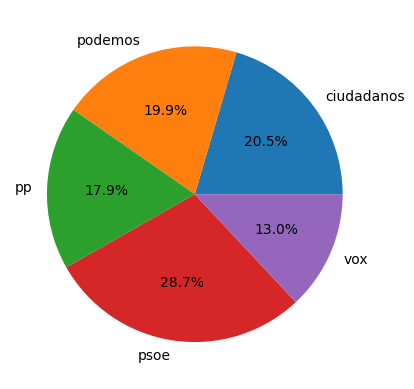

In [223]:
import matplotlib.pyplot as plt

plt.pie(df_conteo['tweet'], labels=df_conteo['partido'], autopct='%1.1f%%')
plt.show()

In [224]:
pip install unidecode

In [225]:
df.info()
df['tweet'] = df['tweet'].fillna('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17519 entries, 0 to 17518
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   partido  17519 non-null  object
 1   tweet    17519 non-null  object
dtypes: object(2)
memory usage: 273.9+ KB


In [226]:
import re
import unidecode
from tqdm import tqdm

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = unidecode.unidecode(tweet)  # Normalizar caracteres con tildes
    tweet = re.sub(r'http\S+', '', tweet)  # Eliminar URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Eliminar menciones
    tweet = re.sub(r'#\w+', '', tweet)  # Eliminar hashtags
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Eliminar caracteres especiales
    return tweet.strip()

tqdm.pandas()
df['clean_tweet'] = df['tweet'].progress_apply(clean_tweet)

df[['partido', 'clean_tweet']].head(5)

100%|██████████| 17519/17519 [00:02<00:00, 7418.03it/s] 


,partido,clean_tweet
0,psoe,buen animo para esta primavera que iniciamos
1,psoe,muy fan de la radicalidad social frente a la d...
2,psoe,nuevos puta duenos para las jodido renovables ...
3,psoe,el diferencial de precios energeticos con alem...
4,psoe,por favor es importante difundir este mensaje ...


In [228]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
from torch.utils.data import DataLoader, Dataset
import pandas as pd

# Inicializar el modelo y el tokenizer de DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Mover el modelo al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

df2 = df[:12]

# Clase para manejar el Dataset
class TweetDataset(Dataset):
    def __init__(self, tweets):
        self.tweets = tweets

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        return self.tweets[idx]

# Función para calcular toxicidad globalmente
def calcular_toxicidad_global(df, palabras_toxicas, batch_size=16):
    tweets = df['clean_tweet'].tolist()
    dataset = TweetDataset(tweets)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    resultados = []
    model.eval()

    with torch.no_grad():
        for batch in dataloader:
            # Tokenizar por lotes
            inputs = tokenizer(batch, return_tensors="pt", truncation=True, padding=True, max_length=512)
            inputs = {key: val.to(device) for key, val in inputs.items()}

            # Obtener predicciones
            outputs = model(**inputs)
            logits = outputs.logits
            predicciones = torch.argmax(logits, dim=1).cpu().numpy()

            # Verificar palabras tóxicas en cada tweet del lote y ajustar predicción
            for tweet, pred in zip(batch, predicciones):
                palabras_encontradas = [palabra for palabra in palabras_toxicas if palabra in tweet.lower()]
                if palabras_encontradas:
                    pred = 1  # Si hay palabras tóxicas explícitas, marcar como tóxico
                resultados.append(pred)

    # Crear una copia del DataFrame para evitar problemas de asignación
    df_resultado = df.copy()
    df_resultado['toxic'] = resultados
    return df_resultado


# Aplicar la función al conjunto global de datos
df_resultado = calcular_toxicidad_global(df, palabras_toxicas)
print(df_resultado)
print(df_resultado["toxic"].value_counts())

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


          partido                                              tweet  \
0            psoe  @vesteve3 @manubenas @ccoo_rm @desobediencia_ ...   
1            psoe  “@kirovast: @Hugo_Moran muy fan de la "radical...   
2            psoe  @ALTAS_PRESIONES Nuevos puta dueños para las j...   
3            psoe  @jumanjisolar @solartradex @josea_dolera El di...   
4            psoe  “@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...   
...           ...                                                ...   
17514  ciudadanos  Qué noticia tan triste el fallecimiento de Cam...   
17515         vox  Bien dicho!Piqué: «Soy español y deseo que gan...   
17516          pp  Triste noticia el fallecimiento de Camilo Sest...   
17517        psoe  Dedican su vida a ayudar a quienes lo necesita...   
17518          pp  En el #DíadeExtremadura reivindicamos la llega...   

                                             clean_tweet  toxic  
0           buen animo para esta primavera que iniciamos      1  
1  

## Carga del Modelo

In [236]:
#script 1 (MÉTRICAS LOCALES):

import torch
from torch.utils.data import DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
from tqdm import tqdm

# ======== 1. Preparación del Dataset ========

# Dividir los datos en conjunto de entrenamiento y validación
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_resultado["clean_tweet"], df_resultado["toxic"], test_size=0.2, random_state=42
)

# Convertir los datos a Dataset de Hugging Face
train_data = Dataset.from_dict({"clean_tweet": train_texts, "toxic": train_labels})
val_data = Dataset.from_dict({"clean_tweet": val_texts, "toxic": val_labels})

# ======== 2. Tokenización ========
def tokenize_function(examples):
    return tokenizer(examples["clean_tweet"], padding="max_length", truncation=True, max_length=128)

# Tokenizar los datasets
train_data = train_data.map(tokenize_function, batched=True)
val_data = val_data.map(tokenize_function, batched=True)

# Renombrar la columna "partido" a "labels" (obligatorio para modelos de Hugging Face)
train_data = train_data.rename_column("toxic", "labels")
val_data = val_data.rename_column("toxic", "labels")

# Formato PyTorch
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# ======== 3. Crear DataLoaders ========
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
val_loader = DataLoader(val_data, batch_size=8)

# ======== 4. Modelo ========
# Cargar el modelo preentrenado DistilBERT

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# ======== 5. Configuración del Optimizer y Scheduler ========
optimizer = AdamW(model.parameters(), lr=5e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# ======== 6. Modificar la función de entrenamiento ========
def train(model, train_loader, optimizer):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc="Entrenando"):
        # Acceso a los datos
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Reiniciar gradientes
        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass
        loss.backward()

        # Actualizar los parámetros
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Loss promedio: {avg_loss}")

def evaluate(model, val_loader):
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Evaluando"):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Métricas
    acc = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average="binary")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1: {f1}")

# ======== 7. Entrenamiento ========
epochs = 3
for epoch in range(epochs):
    print(f"\n===== Época {epoch + 1} =====")
    train(model, train_loader, optimizer)
    evaluate(model, val_loader)

# ======== 8. Guardar el modelo ========
model.save_pretrained("./fine_tuned_distilbert")
tokenizer.save_pretrained("./fine_tuned_distilbert")


Map:   0%|          | 0/14015 [00:00<?, ? examples/s]

Map:   0%|          | 0/3504 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



===== Época 1 =====


Entrenando: 100%|██████████| 1752/1752 [02:46<00:00, 10.49it/s]


Loss promedio: 0.5299383627216769


Evaluando: 100%|██████████| 438/438 [00:12<00:00, 34.90it/s]


Accuracy: 0.7751141552511416
Precision: 0.6836158192090396
Recall: 0.7400611620795107
F1: 0.71071953010279

===== Época 2 =====


Entrenando: 100%|██████████| 1752/1752 [02:46<00:00, 10.49it/s]


Loss promedio: 0.43992836646454997


Evaluando: 100%|██████████| 438/438 [00:12<00:00, 35.17it/s]


Accuracy: 0.8242009132420092
Precision: 0.7720125786163522
Recall: 0.7507645259938838
F1: 0.7612403100775194

===== Época 3 =====


Entrenando: 100%|██████████| 1752/1752 [02:46<00:00, 10.54it/s]


Loss promedio: 0.3542806585553234


Evaluando: 100%|██████████| 438/438 [00:12<00:00, 35.12it/s]


Accuracy: 0.839041095890411
Precision: 0.7844036697247706
Recall: 0.7844036697247706
F1: 0.7844036697247706


('./fine_tuned_distilbert/tokenizer_config.json',
 './fine_tuned_distilbert/special_tokens_map.json',
 './fine_tuned_distilbert/vocab.txt',
 './fine_tuned_distilbert/added_tokens.json')